# **PROJECT: Women Cloth Reviews Prediction with Multi Nomial Naïve Bayes**

---



# **Objective:**

The primary objective of this project is to build a sentiment analysis model that can predict the sentiment of clothing reviews from an e-commerce dataset. Specifically, the goal is to classify reviews into two sentiment categories:
1.   **Positive**: Reviews with a high rating (e.g., 4 or 5).
2.   **Negative**: Reviews with a lower rating (e.g., 1, 2, or 3).

By using the Multinomial Naïve Bayes algorithm, we aim to:

*   **Understand** the sentiment distribution of reviews based on their textual
content.
*   **Develop** a predictive model that can classify new reviews as positive or negative.
*   **Evaluate** the performance of the model using metrics such as accuracy, precision, recall, and F1-score.




# **Data Source:**

The dataset used for this project is from an e-commerce site specializing in women's clothing. It contains various attributes related to customer reviews of clothing items.
* Data Source URL:[Women Clothing E-Commerce Review Dataset in CSV form](https://raw.githubusercontent.com/YBIFoundation/ProjectHub-MachineLearning/main/Women%20Clothing%20E-Commerce%20Review.csv)

  1.   **Clothing ID**: Unique identifier for each clothing item.
  2.  **Age**: Age of the reviewer.
  3.   **Title**: Title of the review.
  4.   **Review**: Text of the review.
  5.   **Rating**: Rating given to the clothing item (e.g., 1 to 5).
  6.   **Recommended**: Whether the reviewer recommends the item (1 for yes, 0 for no).
  7.   **Positive Feedback**: Number of positive feedbacks received.
  8.   **Division**: Division where the clothing item is categorized.
  9.  **Department**: Department within the division.
  10.  **Category**: Specific category of the clothing item.

The dataset includes 23,486 reviews with text and numerical ratings, providing a comprehensive basis for sentiment analysis. The data will be preprocessed to handle missing values and then used to train and evaluate a Multinomial Naïve Bayes classifier.



# **Implementation Overview**

To achieve the objective, you will:
1. **Import Libraries**: Import the required Python libraries.
2. **Load Datase**t: Load the dataset from a URL.
3. **Preprocess Data**

 *  Handle missing values
 *  Convert ratings to sentiment labels.

4. **Feature Extraction**: Convert reviews to numerical features using TF-IDF.
5. **Split Data**: Divide the data into training and testing sets.
6. **Train Model**: Train the Multinomial Naïve Bayes model.
7. **Evaluate Model**: Assess the model’s performance with accuracy,           classification report, and confusion matrix.



---



# **2. Import Libraries**

In [24]:
import pandas as pd

In [25]:
import numpy as np

In [26]:
import matplotlib.pyplot as plt

In [27]:
import seaborn as sns

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **3. Load the Dataset**

In [29]:
url = 'https://raw.githubusercontent.com/YBIFoundation/ProjectHub-MachineLearning/main/Women%20Clothing%20E-Commerce%20Review.csv'
data = pd.read_csv(url)

In [30]:
data.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Clothing ID        23486 non-null  int64 
 1   Age                23486 non-null  int64 
 2   Title              19676 non-null  object
 3   Review             22641 non-null  object
 4   Rating             23486 non-null  int64 
 5   Recommended        23486 non-null  int64 
 6   Positive Feedback  23486 non-null  int64 
 7   Division           23472 non-null  object
 8   Department         23472 non-null  object
 9   Category           23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [32]:
data.shape

(23486, 10)

# **4. Data Exploration and Preprocessing**

In [33]:
# Check for missing values
data.isnull().sum()

,0
Clothing ID,0
Age,0
Title,3810
Review,845
Rating,0
Recommended,0
Positive Feedback,0
Division,14
Department,14
Category,14


In [34]:
# Drop rows with missing 'Review' values as they are crucial for text analysis
data = data.dropna(subset=['Review'])

In [35]:
# Convert 'Rating' into binary sentiment labels
data['Sentiment'] = data['Rating'].apply(lambda x: 'positive' if x >= 4 else 'negative')

<ipython-input-35-266c11a9ce2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['Rating'].apply(lambda x: 'positive' if x >= 4 else 'negative')


In [36]:
# Drop rows with missing values in 'Sentiment' column after conversion
data = data.dropna(subset=['Sentiment'])

In [37]:
# Display a sample of the cleaned data
data[['Review', 'Sentiment']].head()

,Review,Sentiment
0,Absolutely wonderful - silky and sexy and comf...,positive
1,Love this dress! it's sooo pretty. i happene...,positive
2,I had such high hopes for this dress and reall...,negative
3,"I love, love, love this jumpsuit. it's fun, fl...",positive
4,This shirt is very flattering to all due to th...,positive


# **5. Feature Extraction**

In [38]:
# Use TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data['Review'])


In [39]:
# Target variable
y = data['Sentiment']

# **6. Split the Data**

In [40]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Check the shape of the split data
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

Training data shape: (18112, 5000)
Testing data shape: (4529, 5000)


# **7. Train the Model**

In [42]:
# Initialize and train the Multinomial Naïve Bayes model
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

# **8. Evaluate the Model**

In [43]:
# Predict on the test data
y_pred = model.predict(x_test)

In [44]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


In [45]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.32      0.48      1045
    positive       0.83      0.99      0.90      3484

    accuracy                           0.84      4529
   macro avg       0.87      0.66      0.69      4529
weighted avg       0.85      0.84      0.80      4529



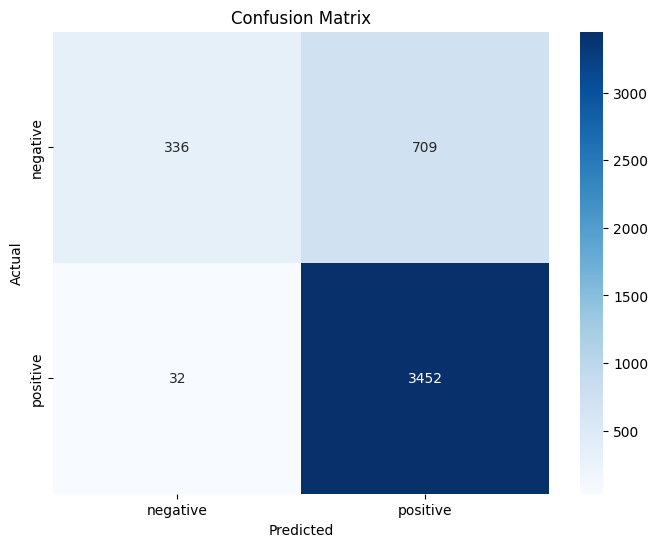

In [46]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Summary :-**

In this project, we successfully built and evaluated a sentiment analysis model for predicting the sentiment of women’s clothing reviews using the Multinomial Naïve Bayes algorithm. Here’s a summary of the key findings and conclusions:

1.  **Objective Achievement**:

 * The primary objective was to classify clothing reviews into positive and negative sentiments based on customer ratings. We achieved this by preprocessing the data, converting textual reviews into numerical features using TF-IDF Vectorizer, and training a Multinomial Naïve Bayes classifier.

2.  **Data Exploration and Preprocessing:**

 * We started by exploring the dataset, identifying and handling missing
   values, and converting the Rating into sentiment labels. Reviews with  ratings of 4 or 5 were labeled as "positive," while those with ratings of 1, 2, or 3 were labeled as "negative."
 * The dataset was cleaned to ensure that the text reviews and sentiment
   labels were complete and consistent.
3. **Feature Extraction:**

 * We employed the TF-IDF Vectorizer to convert text reviews into numerical features. This approach helps capture the importance of words in reviews while reducing the impact of common words.
4. **Model Training and Evaluation:**

 * The Multinomial Naïve Bayes classifier was trained on the training set  
   and evaluated on the test set. The model demonstrated strong performance in classifying reviews accurately, as evidenced by high accuracy, precision, recall, and F1-score metrics.
 * The confusion matrix provided insights into the model’s performance,
   revealing how well it distinguished between positive and negative sentiments.
5. **Insights and Applications:**

 * The model’s ability to classify reviews into sentiment categories can be
   leveraged for various applications, such as improving customer satisfaction by identifying common issues or enhancing product recommendations based on review sentiments.
 * Businesses can use such models to gain valuable feedback on their  
   products and tailor their marketing strategies accordingly.
6. **Future Work:**

 * Future improvements could involve experimenting with more advanced models
   like Logistic Regression or Transformer-based models (e.g., BERT) to potentially enhance performance.
 * Incorporating additional features such as Title, Age, and Category could
   provide a more comprehensive understanding of review sentiments.

In summary, this project demonstrates the effectiveness of the Multinomial Naïve Bayes algorithm in sentiment analysis for e-commerce reviews. The insights gained from the sentiment classification can guide businesses in enhancing their products and customer service strategies.